5. Weather, Road Conditions, and External Factors  


•	How does weather affect accident rates?



--- Severity Level 1 ---
Number of NaN values in 'Weather_Condition': 954
Weather_Condition
Clear                             337
Drizzle                            11
Fair / Windy                      358
Fog                               662
Haze                              222
Heavy Snow                          1
Heavy Snow / Windy                  1
Heavy T-Storm                     150
Light Rain Shower                   8
Light Snow                         86
Light Thunderstorms and Rain        4
Mostly Cloudy                   10676
N/A Precipitation                   1
Partly Cloudy                    6820
Partly Cloudy / Windy             113
Patches of Fog                     18
Rain                              458
Rain / Windy                       13
Scattered Clouds                   73
Squalls / Windy                     1
T-Storm                           211
Widespread Dust                     1
Wintry Mix                          2
Blowing Dust                     

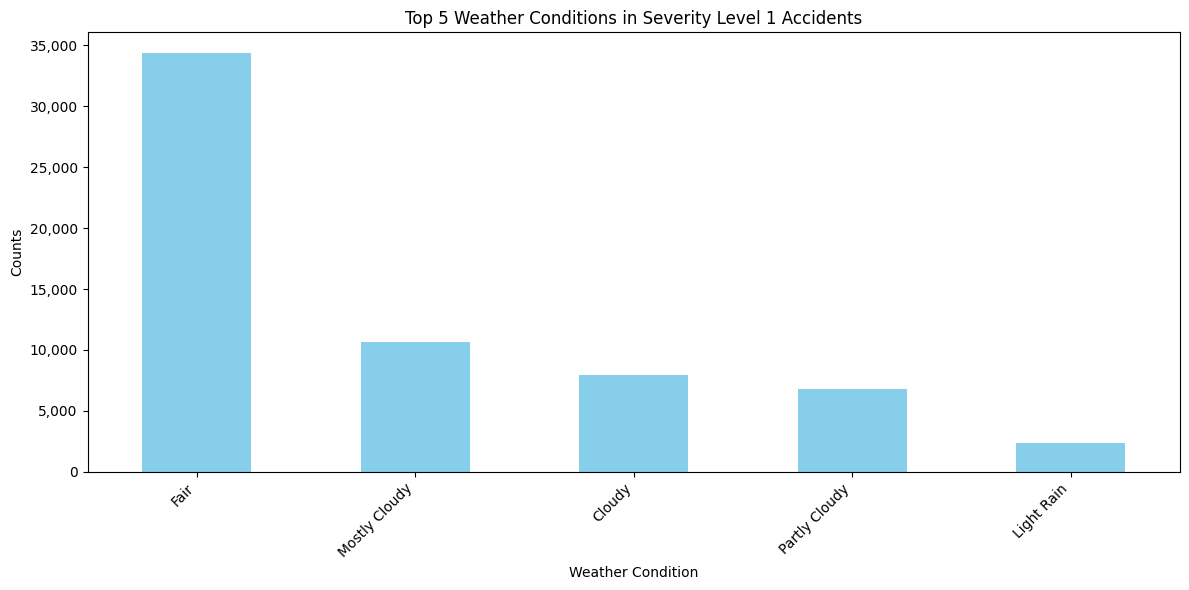


--- Severity Level 2 ---
Number of NaN values in 'Weather_Condition': 134781
Weather_Condition
Blowing Snow / Windy          884
Blowing Snow Nearby             1
Clear                      536971
Drizzle                      3536
Fair / Windy                30845
                            ...  
Thunder in the Vicinity     14877
Thunderstorms and Snow          2
Tornado                        17
Widespread Dust / Windy        22
Wintry Mix / Windy            270
Name: count, Length: 140, dtype: int64[pyarrow]
Top 5 Weather Conditions for Severity Level 2:
Weather_Condition
Fair             2226576
Mostly Cloudy     792735
Cloudy            692929
Partly Cloudy     548760
Clear             536971
Name: count, dtype: int64[pyarrow]


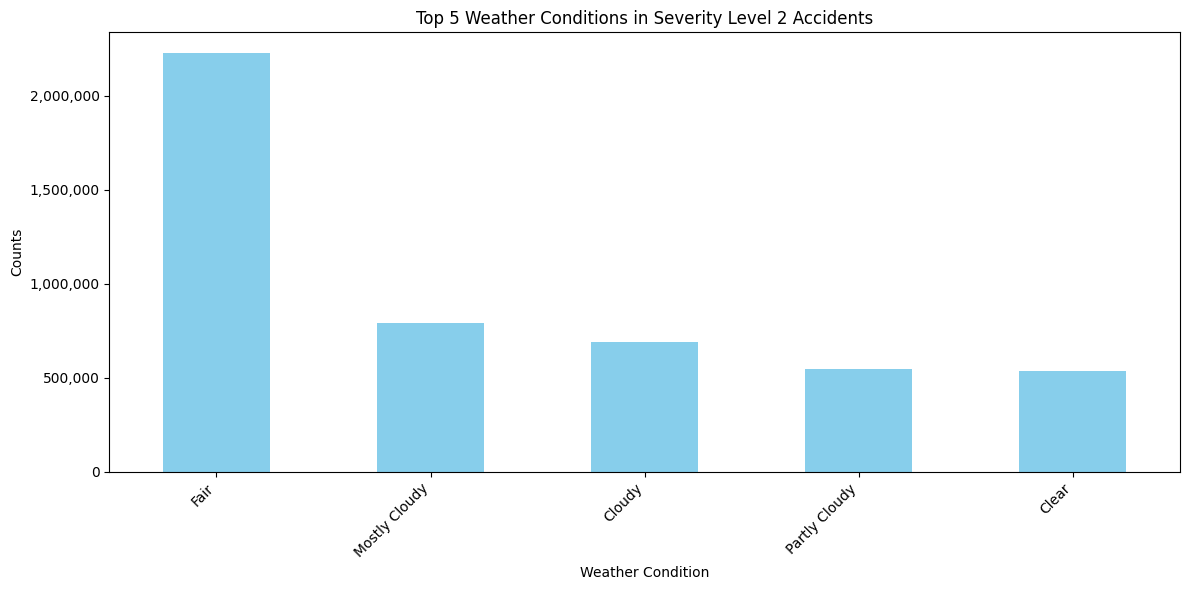


--- Severity Level 3 ---
Number of NaN values in 'Weather_Condition': 30295
Weather_Condition
Blowing Snow / Windy           17
Clear                      244956
Drizzle                       942
Fair / Windy                 3454
Fog                          9590
                            ...  
Thunder / Windy                86
Thunder in the Vicinity      2171
Thunderstorms and Snow          1
Widespread Dust / Windy         2
Wintry Mix / Windy             54
Name: count, Length: 123, dtype: int64[pyarrow]
Top 5 Weather Conditions for Severity Level 3:
Weather_Condition
Clear            244956
Fair             240084
Mostly Cloudy    189229
Partly Cloudy    127692
Overcast         119946
Name: count, dtype: int64[pyarrow]


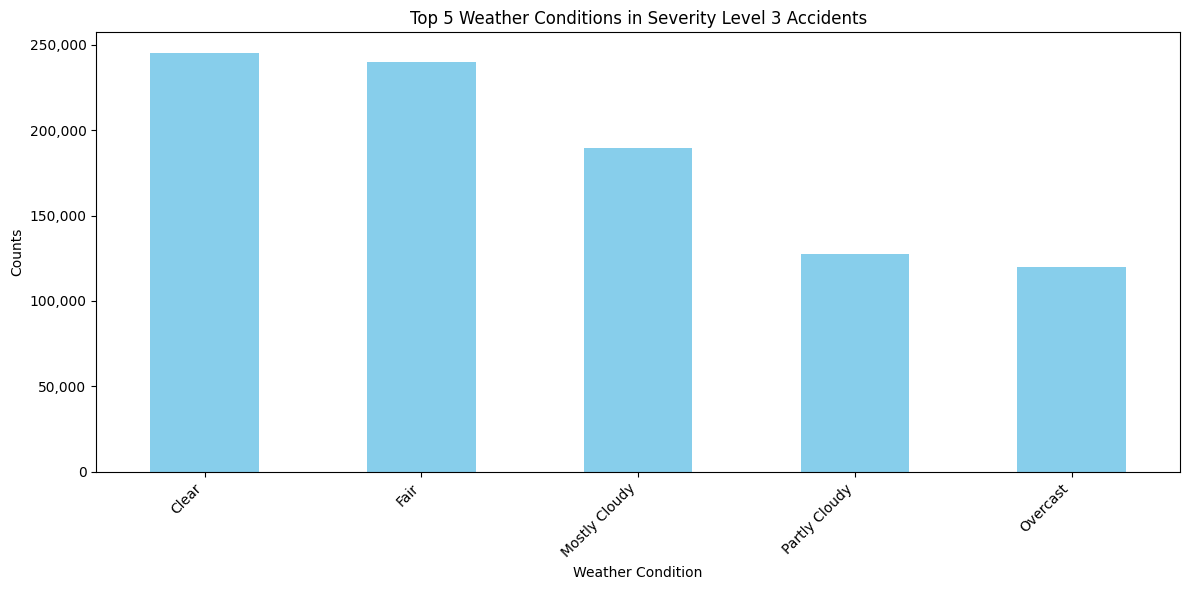


--- Severity Level 4 ---
Number of NaN values in 'Weather_Condition': 7429
Weather_Condition
Blowing Snow / Windy          24
Clear                      26479
Drizzle                      237
Fair / Windy                1014
Fog                         2774
                           ...  
Thunder                      238
Thunder / Windy               18
Thunder in the Vicinity      386
Tornado                        1
Wintry Mix / Windy             7
Name: count, Length: 91, dtype: int64[pyarrow]
Top 5 Weather Conditions for Severity Level 4:
Weather_Condition
Fair             59783
Clear            26479
Mostly Cloudy    23555
Cloudy           22828
Partly Cloudy    15700
Name: count, dtype: int64[pyarrow]


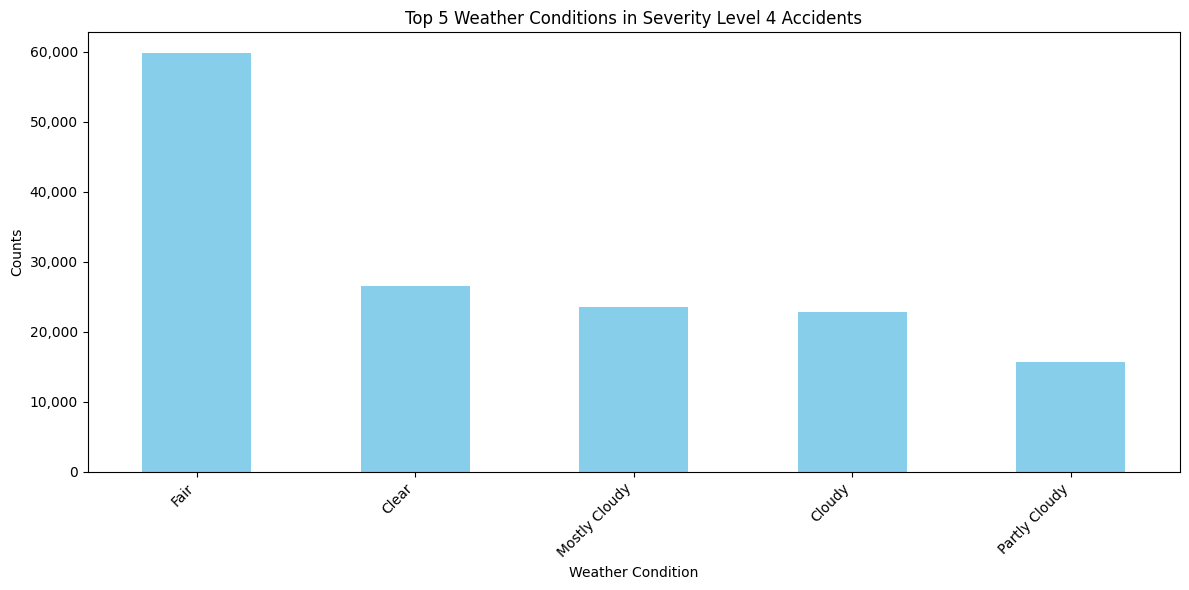

In [21]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import gc

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Loop through each severity level from 1 to 4
for severity in range(1, 5):
    # Filter the DataFrame for the current severity level
    df_severity = df[df['Severity'] == severity]

    # Count occurrences of each weather condition
    severity_counts = df_severity['Weather_Condition'].value_counts().compute()
    total_severity = severity_counts.sum()  # Total count of weather conditions
    nan_count = df_severity['Weather_Condition'].isna().sum().compute()  # Count of NaN values

    # Print the counts
    print(f"\n--- Severity Level {severity} ---")
    print(f"Number of NaN values in 'Weather_Condition': {nan_count}")
    print(severity_counts)

    # Get the top 5 weather conditions
    top_5_severity = severity_counts.nlargest(5)
    print(f"Top 5 Weather Conditions for Severity Level {severity}:\n{top_5_severity}")

    # Plotting
    plt.figure(figsize=(12, 6))
    top_5_severity.plot(kind='bar', color='skyblue')

    # Formatting the plot
    plt.title(f'Top 5 Weather Conditions in Severity Level {severity} Accidents')
    plt.xlabel('Weather Condition')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # Format y-axis as integer
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

•	Do accidents increase during specific holidays or weekends?

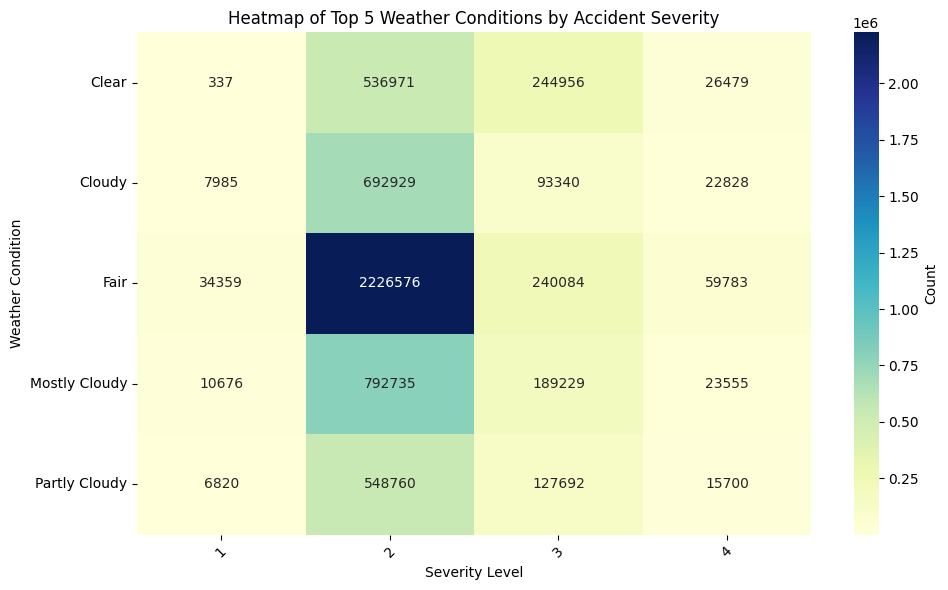

In [19]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')

# Filter for relevant columns
df_filtered = df[['Severity', 'Weather_Condition']]

# Drop rows with NaN values in the filtered DataFrame
df_filtered = df_filtered.dropna()

# Compute the filtered DataFrame
df_filtered = df_filtered.compute()

# Count occurrences of each weather condition
weather_counts = df_filtered['Weather_Condition'].value_counts()

# Get the top 5 weather conditions
top_5_weather = weather_counts.head(5).index

# Filter the DataFrame to include only the top 5 weather conditions
df_top5 = df_filtered[df_filtered['Weather_Condition'].isin(top_5_weather)]

# Create a pivot table to count occurrences of each weather condition by severity
pivot_table = pd.crosstab(df_top5['Weather_Condition'], df_top5['Severity'])

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Top 5 Weather Conditions by Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()